In [1]:
from tensorly.decomposition import parafac
import numpy as np
import h5py

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with h5py.File('distance_tensor.h5', 'r') as hf:
    data = hf['distance_tensor'][:]

print("The shape of the tensor is {}.".format(data.shape))
print(data[0])

The shape of the tensor is (47, 100, 100).
[[0.         1.13643027 2.21913232 ... 1.53740964 1.3629114  1.88236283]
 [1.13643027 0.         2.28072074 ... 1.35106411 1.78818586 2.02638166]
 [2.21913232 2.28072074 0.         ... 1.71916066 2.05953426 2.30436834]
 ...
 [1.53740964 1.35106411 1.71916066 ... 0.         1.5052344  1.53977043]
 [1.3629114  1.78818586 2.05953426 ... 1.5052344  0.         1.85712806]
 [1.88236283 2.02638166 2.30436834 ... 1.53977043 1.85712806 0.        ]]


In [71]:
factors = parafac(data, rank=1)
print(len(factors))

3


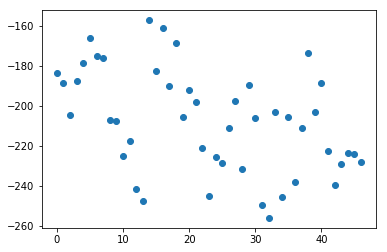

In [82]:
x = np.array(list(range(len(factors[0]))))
plt.scatter(x=x, y=factors[0])

plt.show()

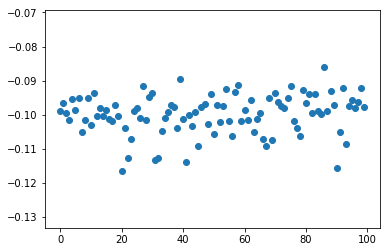

In [76]:
x = np.array(list(range(len(factors[1]))))
plt.scatter(x=x, y=factors[1])

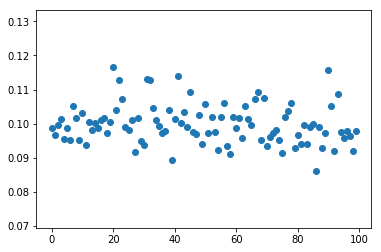

In [81]:
x = np.array(list(range(len(factors[2]))))
plt.scatter(x=x, y=factors[2])

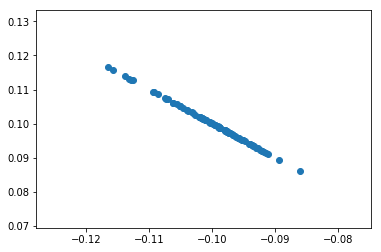

In [83]:
plt.scatter(factors[1], factors[2])